In [204]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from matplotlib.pyplot import figure
import matplotlib.dates as mdates
import datetime
import seaborn as sns

In [205]:
### We recived four seprated datasets from UMTS

In [206]:
### UMTS

In [284]:
xls = pd.ExcelFile(r'../../data/raw/fuel-export-20130701-20220712.xlsx')

In [285]:
df1 = pd.read_excel(xls, 'in')

In [286]:
df1.head()

,timestamp,bus_number,gallons,mileage,previous_mileage
0,2013-07-01 03:38:00,3214,39.3,222553,222371.0
1,2013-07-01 03:05:00,3301,33.2,42486,42289.0
2,2013-07-01 22:16:00,3214,21.5,222670,222553.0
3,2013-07-01 22:20:00,3224,5.2,151729,151686.0
4,2013-07-02 00:25:00,3226,11.2,152869,152807.0


In [287]:
df1['bus_number'].unique()

array([3214, 3301, 3224, 3226, 3228, 3303, 3306, 3304, 3227, 3205, 3305,
       3309, 3203, 3212, 3225, 3221, 3202, 3213, 3201, 3307, 3310, 3222,
       3308, 3123, 3223, 3121, 3211, 3204, 3115, 3119, 3112, 3118, 3122,
       3215, 3401, 3402, 3302, 3311, 3312, 3315, 3314, 3313, 3318, 3316,
       3317, 3319, 3320, 3321, 3322, 3323, 3501, 3324, 3325, 3326],
      dtype=int64)

In [210]:
df1.tail()

,timestamp,bus_number,gallons,mileage,previous_mileage
60396,2022-07-12 01:42:00,3322,20.9,41209,41103.0
60397,2022-07-12 01:49:00,3225,38.7,423501,423351.0
60398,2022-07-12 01:51:00,3317,27.2,53363,53196.0
60399,2022-07-12 01:54:00,3301,43.6,324801,324552.0
60400,2022-07-12 01:58:00,3323,46.2,25241,25036.0


In [211]:
df1['timestamp']= pd.to_datetime(df1['timestamp'])

In [212]:
len(df1['bus_number'].unique())

54

In [213]:
df1.sort_values(by=['timestamp'], ascending=True, inplace=True)

In [214]:
df1['date'] = pd.to_datetime(df1['timestamp']).dt.date
df1['time'] = pd.to_datetime(df1['timestamp']).dt.time

In [215]:
#df1.head()

In [216]:
df1['date']=df1['date'].astype(str)

In [217]:
len(df1['date'].unique())

3265

In [218]:
# df1

In [219]:
df1['time_delta'] = df1.groupby(['bus_number', 'date'])['timestamp'].diff()

In [220]:
df1['time_delta'].max()

Timedelta('0 days 23:59:00')

In [221]:
df1['time_delta'].min()

Timedelta('0 days 00:00:00')

In [222]:
df1.head()

,timestamp,bus_number,gallons,mileage,previous_mileage,date,time,time_delta
1,2013-07-01 03:05:00,3301,33.2,42486,42289.0,2013-07-01,03:05:00,NaT
0,2013-07-01 03:38:00,3214,39.3,222553,222371.0,2013-07-01,03:38:00,NaT
2,2013-07-01 22:16:00,3214,21.5,222670,222553.0,2013-07-01,22:16:00,0 days 18:38:00
3,2013-07-01 22:20:00,3224,5.2,151729,151686.0,2013-07-01,22:20:00,NaT
6,2013-07-01 22:36:00,3303,21.5,48088,47881.0,2013-07-01,22:36:00,NaT


In [223]:
df1.time_delta=df1.time_delta.astype(str).str.replace('0 days ', '')

In [224]:
df1.head()

,timestamp,bus_number,gallons,mileage,previous_mileage,date,time,time_delta
1,2013-07-01 03:05:00,3301,33.2,42486,42289.0,2013-07-01,03:05:00,NaT
0,2013-07-01 03:38:00,3214,39.3,222553,222371.0,2013-07-01,03:38:00,NaT
2,2013-07-01 22:16:00,3214,21.5,222670,222553.0,2013-07-01,22:16:00,18:38:00
3,2013-07-01 22:20:00,3224,5.2,151729,151686.0,2013-07-01,22:20:00,NaT
6,2013-07-01 22:36:00,3303,21.5,48088,47881.0,2013-07-01,22:36:00,NaT


In [225]:
df1['time_delta']= pd.to_datetime(df1['time_delta'])

In [226]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60401 entries, 1 to 60400
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   timestamp         60401 non-null  datetime64[ns]
 1   bus_number        60401 non-null  int64         
 2   gallons           60400 non-null  float64       
 3   mileage           60401 non-null  int64         
 4   previous_mileage  60361 non-null  float64       
 5   date              60401 non-null  object        
 6   time              60401 non-null  object        
 7   time_delta        11546 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(2), object(2)
memory usage: 4.1+ MB


In [227]:
df1['time_delta_in_seconds'] = df1['time_delta'].dt.hour * 3600 + df1['time_delta'].dt.minute * 60 + df1['time_delta'].dt.second

In [228]:
df1.head()

,timestamp,bus_number,gallons,mileage,previous_mileage,date,time,time_delta,time_delta_in_seconds
1,2013-07-01 03:05:00,3301,33.2,42486,42289.0,2013-07-01,03:05:00,NaT,NaN
0,2013-07-01 03:38:00,3214,39.3,222553,222371.0,2013-07-01,03:38:00,NaT,NaN
2,2013-07-01 22:16:00,3214,21.5,222670,222553.0,2013-07-01,22:16:00,2022-07-24 18:38:00,67080.0
3,2013-07-01 22:20:00,3224,5.2,151729,151686.0,2013-07-01,22:20:00,NaT,NaN
6,2013-07-01 22:36:00,3303,21.5,48088,47881.0,2013-07-01,22:36:00,NaT,NaN


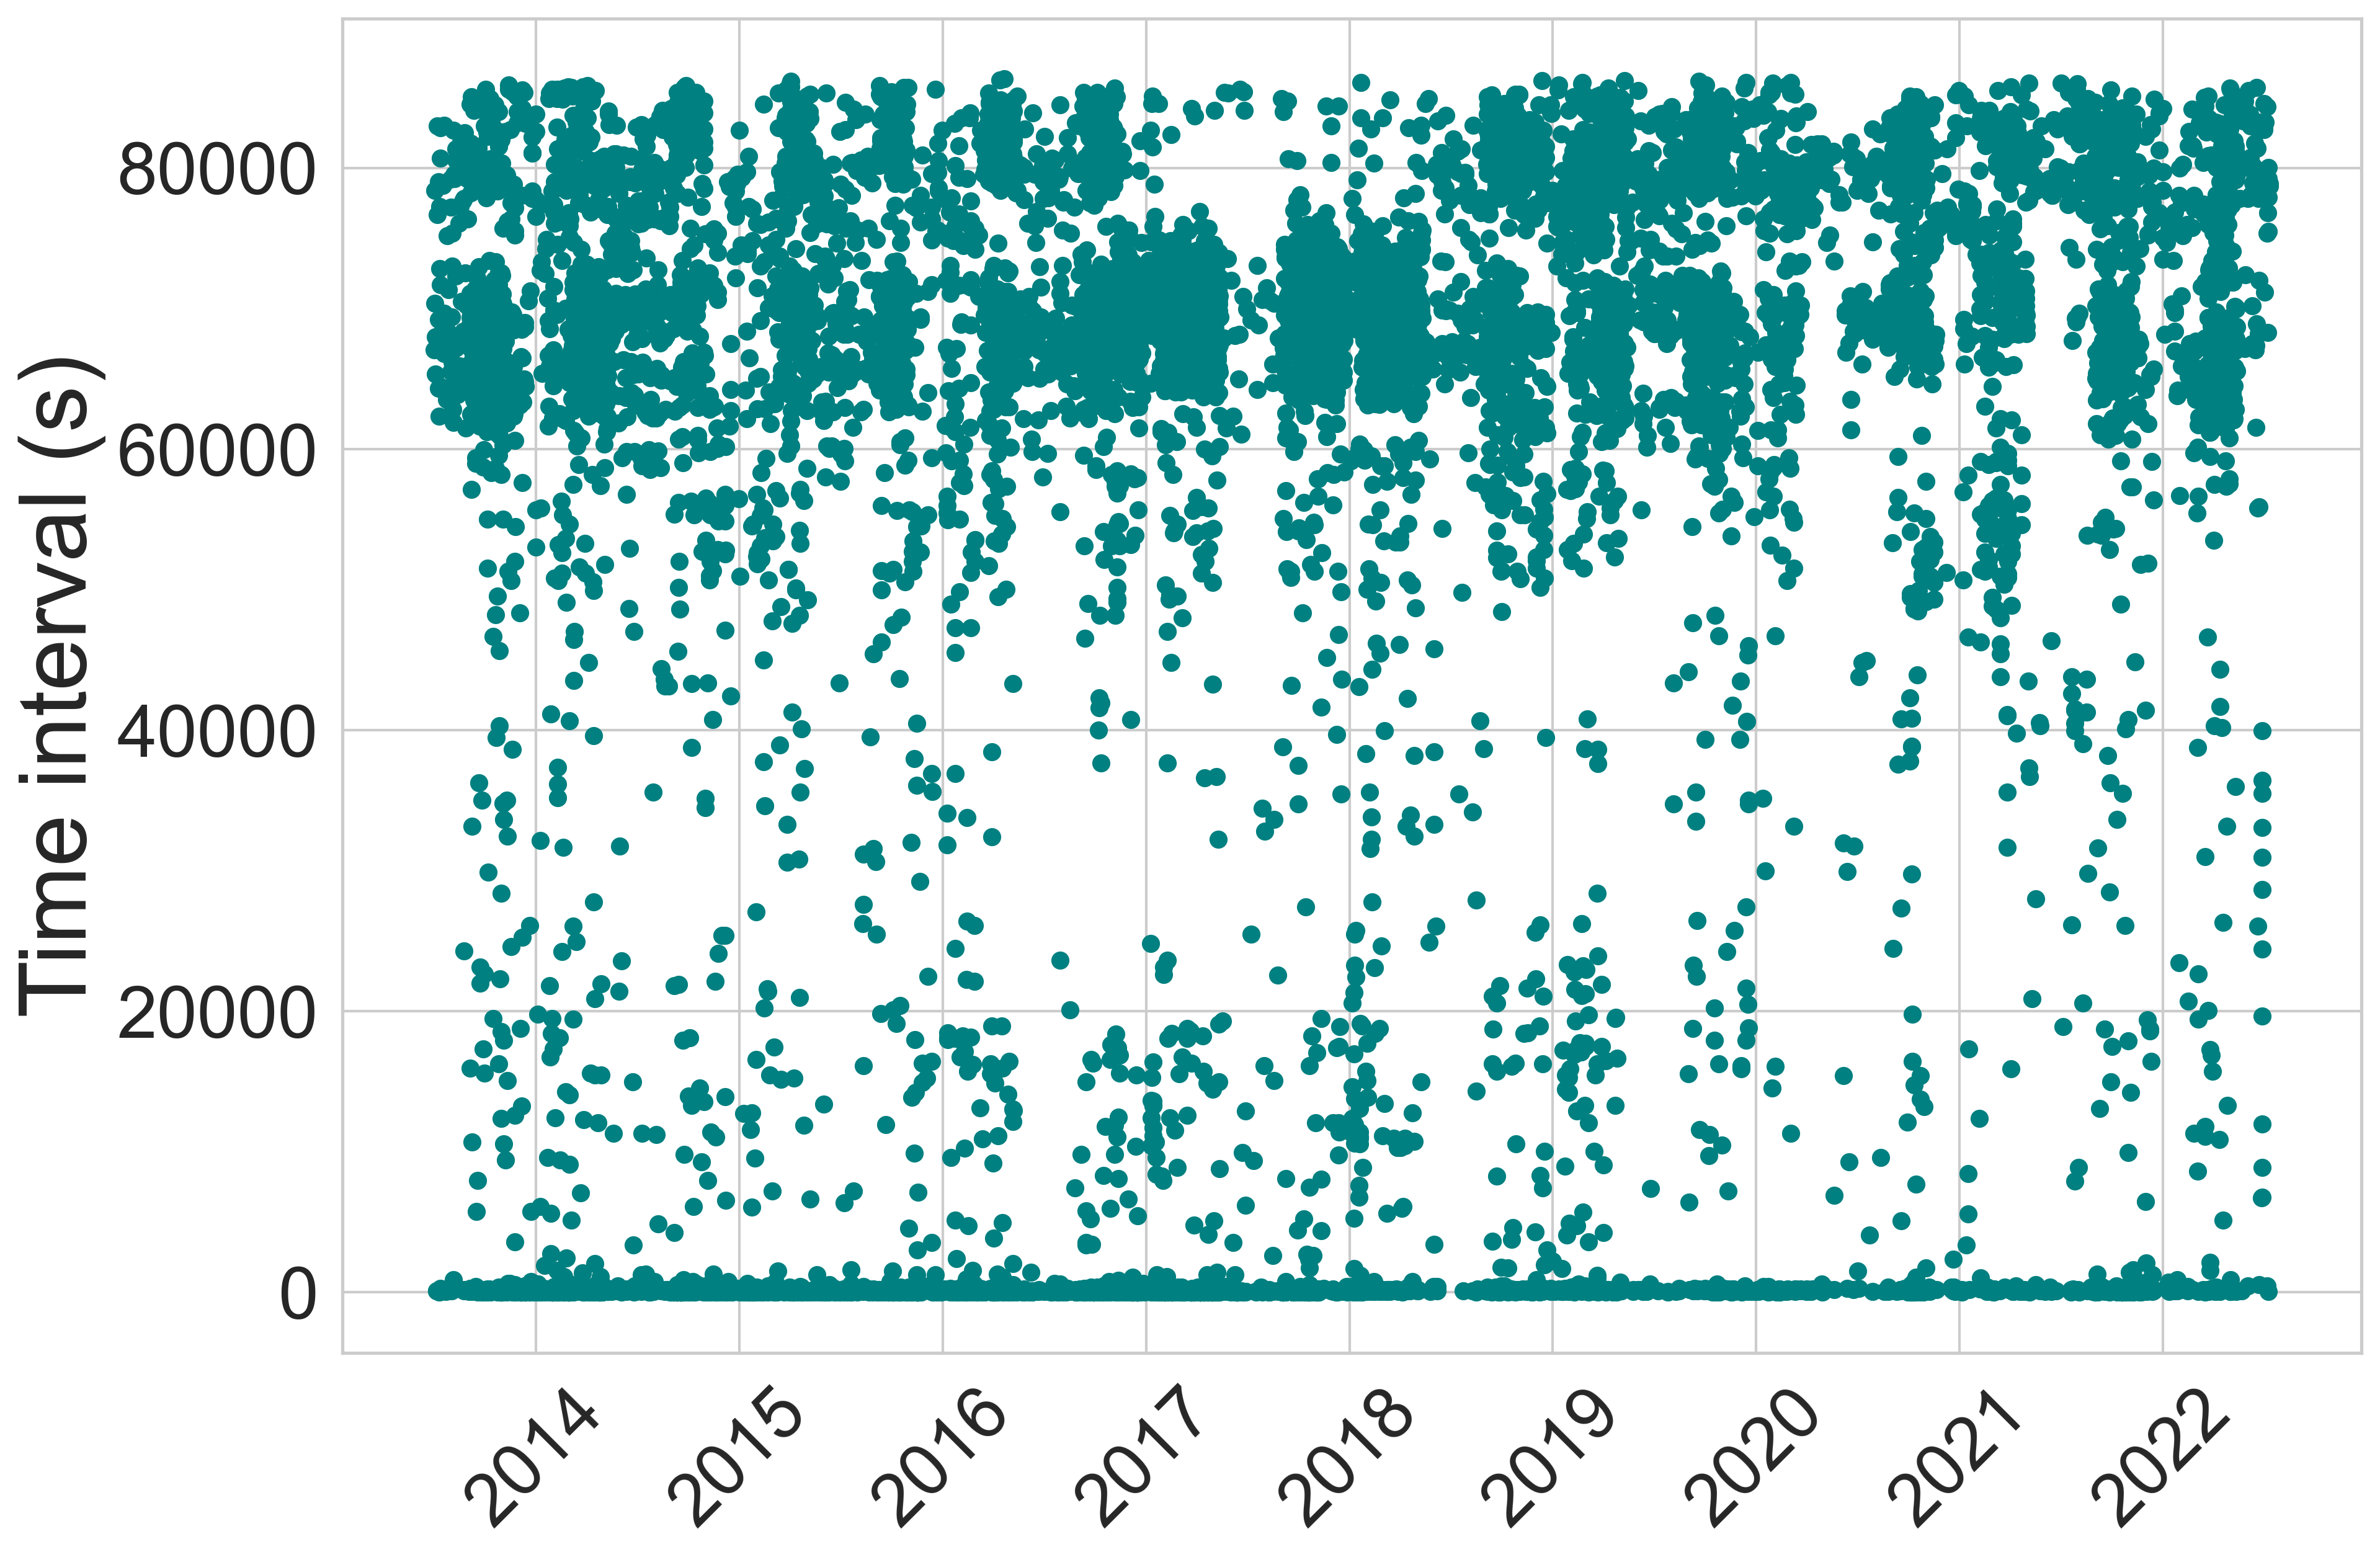

In [229]:
figure(figsize=(14, 9.5), dpi=300)
plt.plot_date(x=df1['timestamp']  , y=df1["time_delta_in_seconds"], fmt='o', tz=None, xdate=True, ydate=False, color='teal')
plt.ylabel("Time interval (s)", fontsize=36)
plt.xticks(fontsize=28, rotation = 45)
plt.yticks(fontsize=28)
plt.savefig(r'../../figures/time-intervals-fuel-filling-UMTS.png', dpi=400, bbox_inches='tight')
plt.show()

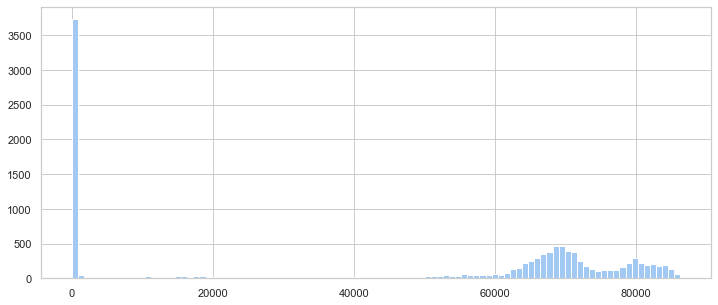

In [230]:
plt.hist(df1['time_delta_in_seconds'], bins=100)
plt.show()

In [231]:
df1['time_delta_in_seconds'].max()

86340.0

In [232]:
df1['time_delta_in_seconds'].min()

0.0

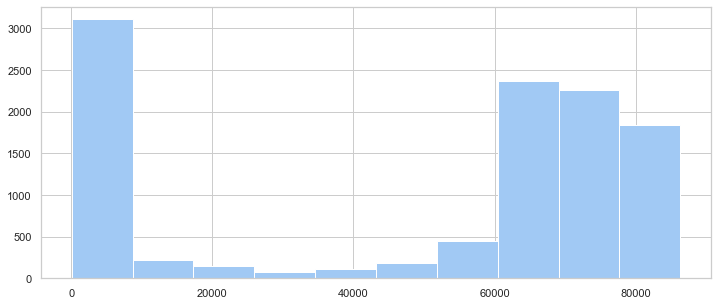

In [233]:
df_time_intervals = df1[df1['time_delta_in_seconds'] > 0]
plt.hist(df_time_intervals['time_delta_in_seconds'])
plt.savefig(r'../../figures/hist-time-intervals-fuel-filling-UMTS.png', dpi=400, bbox_inches='tight')
plt.show()

In [234]:
### CTF (Cottage Street)

In [235]:
xls = pd.ExcelFile(r'../../data/tidy/CTF Fuel Tickets FY22.xlsx')

In [236]:
df2 = pd.read_excel(xls, 'CTF')

In [237]:
df2.head()

,model,Equipment ID,Qty,Transaction Date,Meter1Reading,Fuel Orfluid Type
0,2006 GILLIG 30`,1406,44.36,2021-07-01 20:53:00,376123,DIE
1,2006 GILLIG 30`,1406,8.06,2021-07-02 15:15:00,376170,DIE
2,2006 GILLIG 35`,1510,21.07,2021-07-02 15:30:00,739085,DIE
3,2006 GILLIG 35`,1510,44.99,2021-07-03 20:57:00,739308,DIE
4,2006 GILLIG 35`,1510,32.45,2021-07-04 19:49:00,739464,DIE


In [238]:
df2['model'].unique()

array(['2006 GILLIG 30`', '2006 GILLIG 35`', '2006 GILLIG 40`',
       '2007 GILLIG 40`', '2008 GILLIG 35`', '2008 GILLIG 40`',
       '2010 GILLIG 35`', '2010 GILLIG 40`', '2011 NEW FLYER XD35',
       '2011 NEW FLYER XD40', '2011 NEW FLYER XD40 (HYBRID)',
       '2012 NEW FLYER XD40', '2014 NEW FLYER XD40',
       '2015 NEW FLYER XD35', '2015 NEW FLYER XD40', '2018 GILLIG 40`',
       '2020 NEW FLYER XD35', '2020 NEW FLYER XD40',
       '2020 PROTERRA CATALYST BE-40 (ELECTRIC)', '2021 NEW FLYER XD35',
       '2021 NEW FLYER XD40', '2021 NEW FLYER XE35 (ELECTRIC)',
       '2021 NEW FLYER XE40 (ELECTRIC)', '2022 NEW FLYER XD35',
       '2022 NEW FLYER XD40', 'UMTS GILLIG', 'UMTS NEW FLYER'],
      dtype=object)

In [239]:
df2['vehicle_year'] = df2['model'].str[:4]
df2['model'] = df2['model'].str[5:]

In [240]:
#df2.head()

In [241]:
#df1.to_csv(r'../../data/tidy/CTF Fuel Tickets FY22-tidy.csv')

In [242]:
df2 = pd.read_csv(r'../../data/tidy/CTF Fuel Tickets FY22-tidy.csv', delimiter=',', skiprows=0, low_memory=False)

In [243]:
df2.columns

Index(['Unnamed: 0', 'model', 'vehicle_year', 'type', 'Equipment ID', 'Qty',
       'Transaction Date', 'Meter1Reading', 'Fuel Orfluid Type'],
      dtype='object')

In [244]:
df2['model'].unique()

array(['GILLIG 30`', 'GILLIG 35`', 'GILLIG 40`', 'NEW FLYER XD35',
       'NEW FLYER XD40', 'NEW FLYER XD40 (HYBRID)',
       'PROTERRA CATALYST BE-40 (ELECTRIC)', 'NEW FLYER XE35 (ELECTRIC)',
       'NEW FLYER XE40 (ELECTRIC)', 'UMTS GILLIG', 'UMTS NEW FLYER'],
      dtype=object)

In [245]:
df2['model'].replace('GILLIG 30`', 'GILLIG', inplace=True)
df2['model'].replace('GILLIG 35`', 'GILLIG', inplace=True)
df2['model'].replace('GILLIG 40`', 'GILLIG', inplace=True)
df2['model'].replace('NEW FLYER XD35', 'NEW FLYER', inplace=True)
df2['model'].replace('NEW FLYER XD40', 'NEW FLYER', inplace=True)
df2['model'].replace('NEW FLYER XD40 (HYBRID)', 'NEW FLYER (HYBRID)', inplace=True)
df2['model'].replace('PROTERRA CATALYST BE-40 (ELECTRIC)', 'PROTERRA (ELECTRIC)', inplace=True)
df2['model'].replace('NEW FLYER XE35 (ELECTRIC)', 'NEW FLYER (ELECTRIC)', inplace=True)
df2['model'].replace('NEW FLYER XE40 (ELECTRIC)', 'NEW FLYER (ELECTRIC)', inplace=True)
df2['model'].replace('UMTS GILLIG', 'GILLIG', inplace=True)
df2['model'].replace('UMTS NEW FLYER', 'NEW FLYER', inplace=True)

In [246]:
df2['model'].unique()

array(['GILLIG', 'NEW FLYER', 'NEW FLYER (HYBRID)', 'PROTERRA (ELECTRIC)',
       'NEW FLYER (ELECTRIC)'], dtype=object)

In [247]:
df2['model'].replace('GILLIG', 'Gillig', inplace=True)
df2['model'].replace('NEW FLYER', 'New Flyer', inplace=True)
df2['model'].replace('NEW FLYER (HYBRID)', 'New Flyer (hybrid)', inplace=True)
df2['model'].replace('PROTERRA (ELECTRIC)', 'Proterra (electric)', inplace=True)
df2['model'].replace('NEW FLYER (ELECTRIC)', 'New Flyer (electric)', inplace=True)

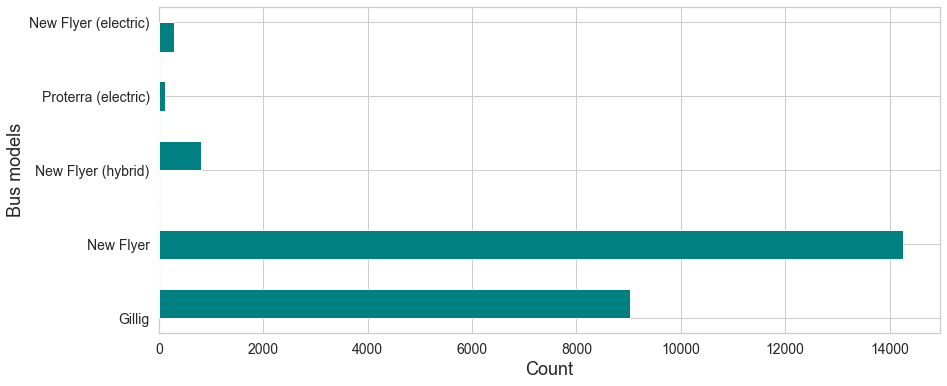

In [248]:
fig, ax = plt.subplots()
df2['model'].hist(figsize = (14,6), orientation='horizontal', color='teal', zorder=3)
plt.ylabel("Bus models", fontsize=18)
plt.xlabel("Count", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [249]:
### NTF (VATCo)

In [250]:
#xls2 = pd.ExcelFile(r'../../data/tidy/NTF Fuel Tickets FY22.xlsx')

In [251]:
#df2 = pd.read_excel(xls, 'NTF')

In [252]:
#df2.head()

In [253]:
#df2['Model'].unique()

In [254]:
#df2['vehicle_year'] = df2['Model'].str[:4]
#df2.rename(columns = {'Model':'model'}, inplace = True)

In [255]:
#df2.to_csv(r'../../data/tidy/NTF Fuel Tickets FY22-tidy.csv')

In [256]:
df3 = pd.read_csv(r'../../data/tidy/NTF Fuel Tickets FY22-tidy.csv', delimiter=',', skiprows=0, low_memory=False)

In [257]:
df3.head()

,Unnamed: 0,model,vehicle_year,type,Equipment ID,Qty,Transaction Date,Meter1Reading,Fuel Orfluid Type
0,0,2007 GILLIG 40`,2007,conventional,7610,25.8,7/1/2021 20:05,492882,DIE
1,1,2007 GILLIG 40`,2007,conventional,7610,18.8,7/2/2021 19:09,492984,DIE
2,2,2007 GILLIG 40`,2007,conventional,7610,20.8,7/3/2021 14:03,493087,DIE
3,3,2007 GILLIG 40`,2007,conventional,7610,24.6,7/6/2021 15:46,493224,DIE
4,4,2007 GILLIG 40`,2007,conventional,7610,24.0,7/7/2021 19:00,493327,DIE


In [258]:
df3['model'].unique()

array(['2007 GILLIG 40`', '2008 GILLIG 35`', '2009 GILLIG 40`',
       '2010 GILLIG 35`', '2011 NEW FLYER XD40', '2012 NEW FLYER XD40',
       '2013 NEW FLYER XDE60 (ARTIC) (HYBRID)', '2020 NEW FLYER XD35',
       '2021 NEW FLYER XD40', '2021 NEW FLYER XE40 (ELECTRIC)',
       '2022 NEW FLYER XD40'], dtype=object)

In [259]:
df3['model'].replace('2007 GILLIG 40`', 'GILLIG', inplace=True)
df3['model'].replace('2008 GILLIG 35`', 'GILLIG', inplace=True)
df3['model'].replace('2009 GILLIG 40`', 'GILLIG', inplace=True)
df3['model'].replace('2010 GILLIG 35`', 'GILLIG', inplace=True)
df3['model'].replace('2011 NEW FLYER XD40', 'NEW FLYER', inplace=True)
df3['model'].replace('2012 NEW FLYER XD40', 'NEW FLYER', inplace=True)
df3['model'].replace('2013 NEW FLYER XDE60 (ARTIC) (HYBRID)', 'NEW FLYER (HYBRID)', inplace=True)
df3['model'].replace('2020 NEW FLYER XD35', 'NEW FLYER', inplace=True)
df3['model'].replace('2021 NEW FLYER XD40', 'NEW FLYER', inplace=True)
df3['model'].replace('2021 NEW FLYER XE40 (ELECTRIC)', 'NEW FLYER (ELECTRIC)', inplace=True)
df3['model'].replace('2022 NEW FLYER XD40', 'NEW FLYER', inplace=True)

In [260]:
df3['model'].unique()

array(['GILLIG', 'NEW FLYER', 'NEW FLYER (HYBRID)',
       'NEW FLYER (ELECTRIC)'], dtype=object)

In [261]:
df3['model'].replace('GILLIG', 'Gillig', inplace=True)
df3['model'].replace('NEW FLYER', 'New Flyer', inplace=True)
df3['model'].replace('NEW FLYER (HYBRID)', 'New Flyer (hybrid)', inplace=True)
df3['model'].replace('PROTERRA (ELECTRIC)', 'Proterra (electric)', inplace=True)
df3['model'].replace('NEW FLYER (ELECTRIC)', 'New Flyer (electric)', inplace=True)

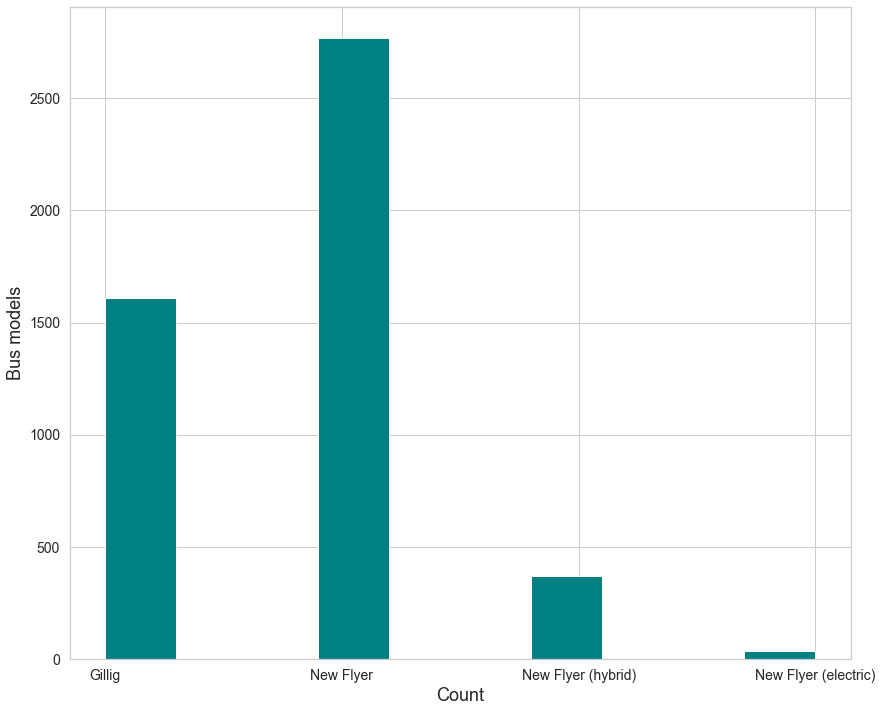

In [262]:
fig, ax = plt.subplots()
df3['model'].hist(figsize = (14,12), color='teal')
plt.ylabel("Bus models", fontsize=18)
plt.xlabel("Count", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [263]:
frames = [df2, df3]
result = pd.concat(frames)

In [264]:
result.columns

Index(['Unnamed: 0', 'model', 'vehicle_year', 'type', 'Equipment ID', 'Qty',
       'Transaction Date', 'Meter1Reading', 'Fuel Orfluid Type'],
      dtype='object')

In [265]:
result

,Unnamed: 0,model,vehicle_year,type,Equipment ID,Qty,Transaction Date,Meter1Reading,Fuel Orfluid Type
0,0,Gillig,2006,conventional,1406,44.36,7/1/2021 20:53,376123,DIE
1,1,Gillig,2006,conventional,1406,8.06,7/2/2021 15:15,376170,DIE
2,2,Gillig,2006,conventional,1510,21.07,7/2/2021 15:30,739085,DIE
3,3,Gillig,2006,conventional,1510,44.99,7/3/2021 20:57,739308,DIE
4,4,Gillig,2006,conventional,1510,32.45,7/4/2021 19:49,739464,DIE
...,...,...,...,...,...,...,...,...,...
4781,4781,New Flyer,2022,conventional,7817,6.30,6/20/2022 16:58,2826,DIE
4782,4782,New Flyer,2022,conventional,7817,38.90,6/22/2022 6:35,3014,DIE
4783,4783,New Flyer,2022,conventional,7817,6.50,6/22/2022 17:06,3062,DIE
4784,4784,New Flyer,2022,conventional,7817,22.20,6/25/2022 14:00,3173,DIE


In [266]:
mydict = {
  'Gillig': 'conventional',
  'New Flyer': 'conventional',
  'New Flyer (hybrid)': 'hybrid',
  'New Flyer (electric)': 'electric',
  'Proterra (electric)': 'electric',
}

In [267]:
result['Powertrain'] = result['model'].map(mydict)
result['Powertrain'].unique()

array(['conventional', 'hybrid', 'electric'], dtype=object)

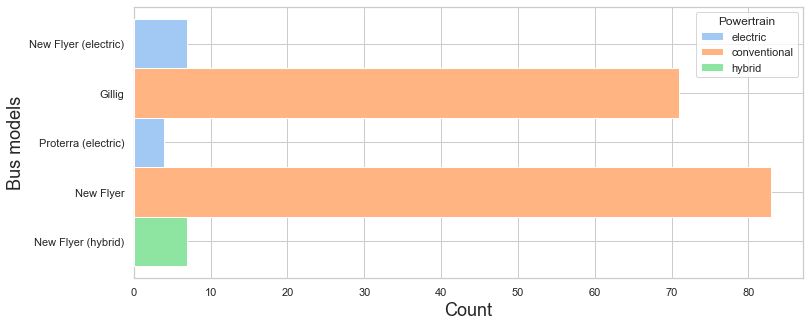

In [268]:
plot=result.groupby(by=['Equipment ID'])['model'].max()
df_plot = result.groupby('Equipment ID').agg({'model':'max', 'Powertrain':'max'})[['model','Powertrain']].reset_index()
df_plot
sns.set(rc={'figure.figsize':(12,5)})
sns.set_theme(style="whitegrid", palette="pastel")
p = sns.histplot(data=df_plot, y='model', hue="Powertrain", zorder=3, alpha  = 1)
p.set_ylabel("Bus models", fontsize=18)
p.set_xlabel("Count", fontsize=18)
#p.set_xticks(fontsize=14)
#p.set_yticks(fontsize=14)
figure = p.get_figure()    
figure.savefig(r'../../figures/hist-fleet-models.png', dpi=400, bbox_inches='tight')

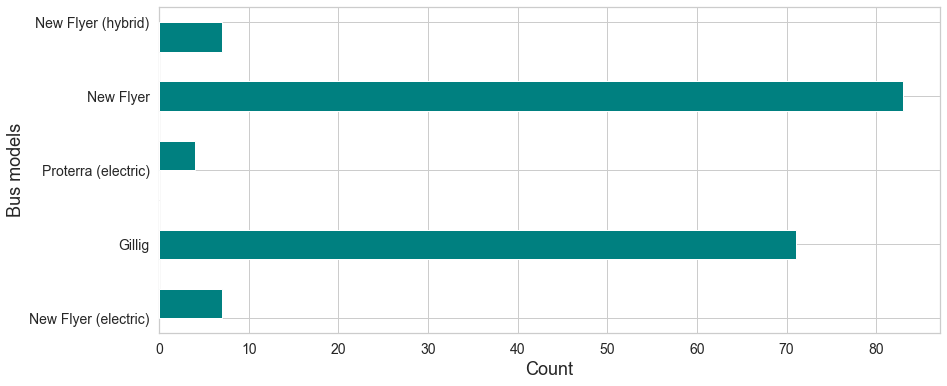

In [269]:
fig, ax = plt.subplots()
data=result.groupby(by=['Equipment ID'])['model'].max()
#result['model'].groupby('Equipment ID').hist(figsize = (14,12), color='teal')
data.hist(figsize = (14,6),  orientation='horizontal', color='teal', zorder=3)
plt.ylabel("Bus models", fontsize=18)
plt.xlabel("Count", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()
fig.savefig(r'../../figures/hist-fleet-models.png', dpi=400, bbox_inches='tight')

In [270]:
res = result.pivot_table(index='Equipment ID', columns='model', aggfunc='count', fill_value=0)
res

Fuel Orfluid Type                                 \
model                   Gillig New Flyer New Flyer (electric)   
Equipment ID                                                    
1320                         0         0                   26   
1321                         0         0                   13   
1322                         0         0                   44   
1323                         0         0                   54   
1406                         2         0                    0   
...                        ...       ...                  ...   
7815                         0       287                    0   
7816                         0       247                    0   
7817                         0        17                    0   
7901                         0         0                    0   
7902                         0         0                    0   

                                                    Meter1Reading            \
model        New Flyer (hybrid) Proterra (electric)        Gillig New Flyer   
Equipment ID                                                                  
1320                          0                   0             0         0   
1321                          0                   0             0         0   
1322                          0                   0             0         0   
1323                          0                   0             0         0   
1406                          0                   0             2         0   
...                         ...                 ...           ...       ...   
7815                          0                   0             0       287   
7816                          0                   0             0       247   
7817                          0                   0             0        17   
7901                        185                   0             0         0   
7902                        185                   0             0         0   

                                                                          ...  \
model        New Flyer (electric) New Flyer (hybrid) Proterra (electric)  ...   
Equipment ID                                                              ...   
1320                           26                  0                   0  ...   
1321                           13                  0                   0  ...   
1322                           44                  0                   0  ...   
1323                           54                  0                   0  ...   
1406                            0                  0                   0  ...   
...                           ...                ...                 ...  ...   
7815                            0                  0                   0  ...   
7816                            0                  0                   0  ...   
7817                            0                  0                   0  ...   
7901                            0                185                   0  ...   
7902                            0                185                   0  ...   

               type                                                    \
model        Gillig New Flyer New Flyer (electric) New Flyer (hybrid)   
Equipment ID                                                            
1320              0         0                   26                  0   
1321              0         0                   13                  0   
1322              0         0                   44                  0   
1323              0         0                   54                  0   
1406              2         0                    0                  0   
...             ...       ...                  ...                ...   
7815              0       287                    0                  0   
7816              0       247                    0                  0   
7817              0        17                    0       

In [271]:
veh = df1['bus_number'].unique()
data=result.loc[result['Equipment ID'].isin(veh)],

In [272]:
#data['Equipment ID'].unique()
data

(       Unnamed: 0      model vehicle_year          type  Equipment ID    Qty  \
 24455       24455     Gillig         UMTS  conventional          3211   8.45   
 24456       24456     Gillig         UMTS  conventional          3211  22.59   
 24457       24457     Gillig         UMTS  conventional          3211   4.65   
 24458       24458     Gillig         UMTS  conventional          3211  13.80   
 24459       24459     Gillig         UMTS  conventional          3211  15.37   
 24460       24460     Gillig         UMTS  conventional          3211   8.13   
 24461       24461     Gillig         UMTS  conventional          3211  10.53   
 24462       24462     Gillig         UMTS  conventional          3211  17.99   
 24463       24463     Gillig         UMTS  conventional          3211  12.72   
 24464       24464     Gillig         UMTS  conventional          3211   4.64   
 24465       24465     Gillig         UMTS  conventional          3211  13.45   
 24466       24466     Gilli

In [273]:
len(result['Equipment ID'].unique())

172

In [274]:
df1

,timestamp,bus_number,gallons,mileage,previous_mileage,date,time,time_delta,time_delta_in_seconds
1,2013-07-01 03:05:00,3301,33.2,42486,42289.0,2013-07-01,03:05:00,NaT,NaN
0,2013-07-01 03:38:00,3214,39.3,222553,222371.0,2013-07-01,03:38:00,NaT,NaN
2,2013-07-01 22:16:00,3214,21.5,222670,222553.0,2013-07-01,22:16:00,2022-07-24 18:38:00,67080.0
3,2013-07-01 22:20:00,3224,5.2,151729,151686.0,2013-07-01,22:20:00,NaT,NaN
6,2013-07-01 22:36:00,3303,21.5,48088,47881.0,2013-07-01,22:36:00,NaT,NaN
...,...,...,...,...,...,...,...,...,...
60396,2022-07-12 01:42:00,3322,20.9,41209,41103.0,2022-07-12,01:42:00,NaT,NaN
60397,2022-07-12 01:49:00,3225,38.7,423501,423351.0,2022-07-12,01:49:00,NaT,NaN
60398,2022-07-12 01:51:00,3317,27.2,53363,53196.0,2022-07-12,01:51:00,NaT,NaN
60399,2022-07-12 01:54:00,3301,43.6,324801,324552.0,2022-07-12,01:54:00,NaT,NaN


In [275]:
df1_sum['date']= pd.to_datetime(df1['date'])

In [276]:
len(df1['bus_number'].unique())

54

In [277]:
len(df1['date'].unique())

3265

In [278]:
df1_sum = df1.groupby(['bus_number', 'date']).agg({'gallons': "sum"}).reset_index()
df1_sum

,bus_number,date,gallons
0,3112,2013-08-01,2.4
1,3112,2013-09-03,38.3
2,3112,2013-09-04,30.6
3,3112,2013-09-05,25.4
4,3112,2013-09-06,4.2
...,...,...,...
48850,3501,2022-05-20,0.5
48851,3501,2022-05-27,0.6
48852,3501,2022-06-03,0.6
48853,3501,2022-06-18,0.5


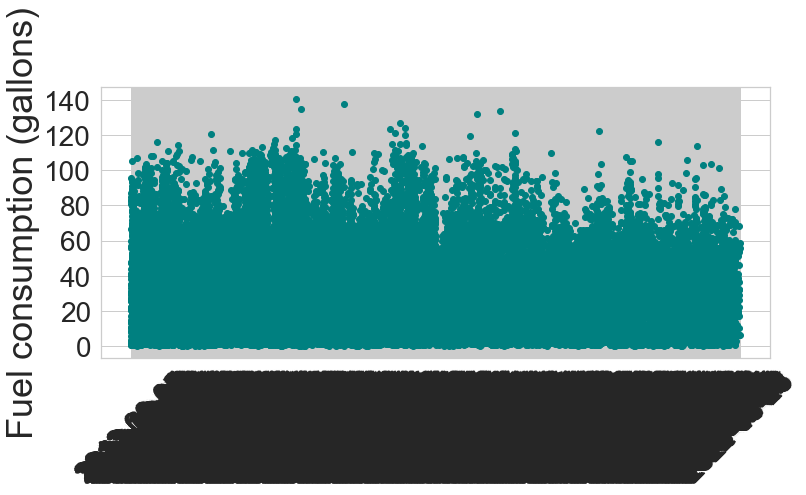

In [280]:
#fig, ax = plt.subplots()
#figure(figsize=(14, 9.5), dpi=300)
plt.plot_date(x=df1_sum['date']  , y=df1_sum["gallons"], fmt='o', tz=None, xdate=True, ydate=False, color='teal')
#myFmt = mdates.DateFormatter('%Y')
#ax.xaxis.set_major_formatter(myFmt)
plt.ylabel("Fuel consumption (gallons)", fontsize=36)
plt.xticks(fontsize=28, rotation = 45)
plt.yticks(fontsize=28)
plt.savefig(r'../../figures/fuel-consumption-UMTS.png', dpi=400, bbox_inches='tight')
plt.show()

In [281]:
UMTS_daily_fuel_consumption=df1_sum['gallons'].mean()
UMTS_daily_fuel_consumption

34.38316651315117

In [282]:
df2['date'] = pd.to_datetime(df2['Transaction Date']).dt.date
df2['time'] = pd.to_datetime(df2['Transaction Date']).dt.time
df2_sum = df2.groupby(['Equipment ID', 'date']).agg({'Qty': "sum"}).reset_index()
df2_sum

,Equipment ID,date,Qty
0,1320,2021-12-03,3.60
1,1320,2021-12-07,0.65
2,1320,2022-01-28,1.76
3,1320,2022-01-31,0.57
4,1320,2022-02-01,1.14
...,...,...,...
23664,3308,2021-10-18,24.11
23665,3308,2021-10-19,8.29
23666,3308,2021-10-21,13.04
23667,3308,2021-10-22,6.88


In [283]:
figure(figsize=(14, 9.5), dpi=300)
plt.plot_date(x=df2_sum['date']  , y=df2_sum["Qty"], fmt='o', tz=None, xdate=True, ydate=False, color='teal')
plt.ylabel("Fuel consumption (gallons)", fontsize=36)
plt.xticks(fontsize=28, rotation = 45)
plt.yticks(fontsize=28)
plt.savefig(r'../../figures/fuel-consumption-VATCo.png', dpi=400, bbox_inches='tight')
plt.show()

TypeError: 'Figure' object is not callable

In [ ]:
VATCo_daily_fuel_consumption=df2_sum['Qty'].mean()
VATCo_daily_fuel_consumption

In [ ]:
df3['date'] = pd.to_datetime(df3['Transaction Date']).dt.date
df3['time'] = pd.to_datetime(df3['Transaction Date']).dt.time
df3_sum = df3.groupby(['Equipment ID', 'date']).agg({'Qty': "sum"}).reset_index()
df3_sum

In [ ]:
figure(figsize=(14, 9.5), dpi=300)
plt.plot_date(x=df3_sum['date']  , y=df3_sum["Qty"], fmt='o', tz=None, xdate=True, ydate=False, color='teal')
plt.ylabel("Fuel consumption (gallons)", fontsize=36)
plt.xticks(fontsize=28, rotation = 45)
plt.yticks(fontsize=28)
plt.savefig(r'../../figures/fuel-consumption-Cottage Street.png', dpi=400, bbox_inches='tight')
plt.show()

In [ ]:
df1

In [ ]:
df2

In [ ]:
df3

In [ ]:
#df1_april2022 = df1[["timestamp", "bus_number", 'gallons', 'date']].copy()
#df1_april2022 = df1_april2022.groupby('date').agg({'model':'max', 'Powertrain':'max'})[['model','Powertrain']].reset_index()

In [ ]:
df1_clean = df1[["timestamp", "bus_number", 'gallons', 'date']].copy()
df1_clean.rename(
    columns={"bus_number":"equipment_id",
                "Qty":"gallons"}
          ,inplace=True)

In [ ]:
df2_clean = df2[["Transaction Date", "Equipment ID", 'Qty', 'date']].copy()
df2_clean.rename(
    columns={"Transaction Date":"timestamp",
             "Equipment ID":"equipment_id",
             "Qty":"gallons"}
          ,inplace=True)

In [ ]:
df3_clean = df3[["Transaction Date", "Equipment ID", 'Qty', 'date']].copy()
df3_clean.rename(
    columns={"Transaction Date":"timestamp",
             "Equipment ID":"equipment_id",
             "Qty":"gallons"}
          ,inplace=True)

In [ ]:
frames = [df1_clean, df2_clean, df3_clean]
  
df_energy_validation = pd.concat(frames)
df_energy_validation

In [107]:
df_energy_validation.to_csv(r'../../data/tidy/energy_validation.csv')

In [108]:
selected_dates=['2022-04-01','2022-04-01','2022-04-01','2022-04-02','2022-04-03','2022-04-04','2022-04-05','2022-04-06','2022-04-07',
                '2022-04-08','2022-04-09','2022-04-10','2022-04-11','2022-04-12','2022-04-13','2022-04-14','2022-04-15','2022-04-16',
                '2022-04-17','2022-04-18','2022-04-19','2022-04-20','2022-04-21','2022-04-22','2022-04-23','2022-04-24','2022-04-25',
                '2022-04-26','2022-04-27','2022-04-28','2022-04-29','2022-04-30']
df_energy_validation_april2022=df_energy_validation.loc[df_energy_validation.date.isin(selected_dates)]

In [109]:
df_energy_validation_april2022

,timestamp,equipment_id,gallons,date
58932,2022-04-01 00:04:00,3213,46.9,2022-04-01
58933,2022-04-01 00:11:00,3303,16.0,2022-04-01
58934,2022-04-01 00:19:00,3322,31.7,2022-04-01
58935,2022-04-01 00:28:00,3312,35.2,2022-04-01
58936,2022-04-01 00:33:00,3307,33.4,2022-04-01
...,...,...,...,...
59562,2022-04-30 17:45:00,3319,0.8,2022-04-30
59563,2022-04-30 22:52:00,3228,20.9,2022-04-30
59564,2022-04-30 23:29:00,3314,23.5,2022-04-30
59565,2022-04-30 23:43:00,3401,40.6,2022-04-30


In [93]:
len(df_energy_validation_april2022['equipment_id'].unique())

39

In [94]:
df_energy_validation_april2022.to_csv(r'../../data/tidy/energy_validation_april2022.csv')

In [95]:
df_energy_validation_april2022

,timestamp,equipment_id,gallons,date
58932,2022-04-01 00:04:00,3213,46.9,2022-04-01
58933,2022-04-01 00:11:00,3303,16.0,2022-04-01
58934,2022-04-01 00:19:00,3322,31.7,2022-04-01
58935,2022-04-01 00:28:00,3312,35.2,2022-04-01
58936,2022-04-01 00:33:00,3307,33.4,2022-04-01
...,...,...,...,...
59562,2022-04-30 17:45:00,3319,0.8,2022-04-30
59563,2022-04-30 22:52:00,3228,20.9,2022-04-30
59564,2022-04-30 23:29:00,3314,23.5,2022-04-30
59565,2022-04-30 23:43:00,3401,40.6,2022-04-30


In [96]:
#df_energy_validation_april2022
df_total_daily_consumption = df_energy_validation_april2022.groupby('date').agg({'gallons':'sum'})[['gallons']].reset_index()

In [97]:
df_total_daily_consumption

,date,gallons
0,2022-04-01,903.4
1,2022-04-02,675.1
2,2022-04-03,315.9
3,2022-04-04,340.5
4,2022-04-05,634.2
5,2022-04-06,669.4
6,2022-04-07,584.2
7,2022-04-08,764.3
8,2022-04-09,448.7
9,2022-04-10,393.9


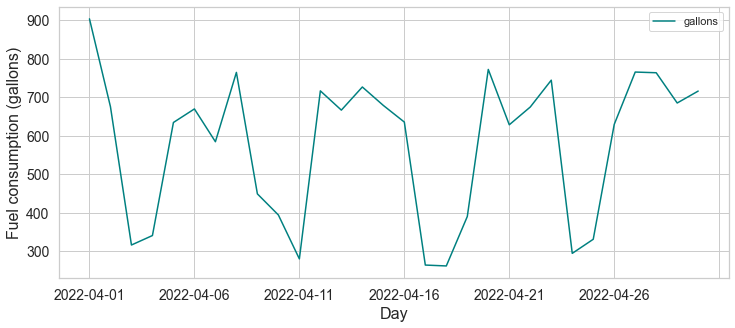

In [98]:
df_total_daily_consumption.plot(x="date", y="gallons", color='teal')
plt.ylabel("Fuel consumption (gallons)", fontsize=16)
plt.xlabel("Day", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig(r'../../figures/fuel-consumption.png', dpi=400, bbox_inches='tight')
plt.show()

In [99]:
df_total_daily_consumption['gallons'].mean()

578.3166666666667

In [100]:
df_total_daily_consumption['gallons'].median()

650.8